In [1]:
#Cell 1 Checking GPU availablility 
import torch

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


Torch version: 2.8.0+cu126
CUDA available: True
GPU: Tesla T4


In [2]:
#Cell 2 Installing Dependencies 
!pip install -U \
    ultralytics \
    opencv-python-headless \
    matplotlib \
    scikit-learn \
    pillow \
    tqdm \
    git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-x5v6pwqj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-x5v6pwqj
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 108.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 112.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 116.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.7 MB/s eta 0:00:00
   ━

In [3]:
#Cell 3 Installing SAM
!git clone https://github.com/facebookresearch/segment-anything.git
!pip install -e segment-anything


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Total 304 (delta 0), reused 0 (delta 0), pack-reused 304 (from 1)
Receiving objects: 100% (304/304), 18.31 MiB | 37.13 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Obtaining file:///kaggle/working/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything


In [4]:
# Cell 4 SAM Checkpoint -.pht file that we will be copying to our local env 
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth


--2026-02-03 10:15:06--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.118.30, 99.84.118.67, 99.84.118.60, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.118.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   323MB/s    in 1.1s    

2026-02-03 10:15:08 (323 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



In [7]:
!pip uninstall -y pillow
!pip install pillow==9.5.0


Found existing installation: pillow 12.1.0
Uninstalling pillow-12.1.0:
  Successfully uninstalled pillow-12.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 40.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-9.5.0-cp312-cp312-linux_x86_64.whl size=1255303 sha256=1ae048850fac78b8dc8f41b8e6f39a596880363814bf8793b11749e20de5908f
  Stored in directory: /root/.cache/pip/wheels/ea/de/2e/75a6399e5d8cd3a55c13c8f0658d996d4ce4cff37389de044c
Successfully built pillow
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
ydata-profiling 4.18.1 requires matplotlib<=3.10,>=3.5, but you have matplotlib 3.10.8 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 whi

In [8]:
# Cell 5 Verifying YOLO installation
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
print("YOLO loaded successfully ✅")



YOLO loaded successfully ✅


In [10]:
#Cell 6 Verifying uplaoded images 
import os

INPUT_DIR = "/kaggle/input/test-1"

print("Files in input directory:")
for f in os.listdir(INPUT_DIR):
    print(" -", f)


Files in input directory:
 - mahesh-babu-handsome-indian-actor-maheshbabu-wallpaper-poster-1-original-imaga7xucq4sgbby.webp
 - 62638761.avif
 - madhavan-stills-photos-pictures-92.jpg
 - 2025-12-11T07_08_13.116Z-image.png
 - pexels-amar-33508017.jpg
 - nationalherald_2021-08_81d0cdf2-729c-4237-b7c8-4eecd0901955_5_Times_Mahesh_Babu_Aced_It.webp
 - Simbu-1-1.jpg
 - MV5BYTI4MmZjOGEtMDM1Yi00OTBlLTgzYTgtM2YzYzczYzVmYmI4XkEyXkFqcGc._V1_.jpg
 - 1489041996-r-madhavan-fb-517.jpg


In [11]:
# Cell 7 Moving images into Phase 1 folder 
import shutil
import os

SRC_DIR = "/kaggle/input/test-1"
DST_DIR = "/kaggle/working/phase1/data/raw_images"

os.makedirs(DST_DIR, exist_ok=True)

for file in os.listdir(SRC_DIR):
    if file.lower().endswith((".jpg", ".jpeg", ".png", ".avif")):
        shutil.copy(
            os.path.join(SRC_DIR, file),
            os.path.join(DST_DIR, file)
        )

print("Images copied to raw_images folder")


Images copied to raw_images folder


In [14]:
# Cell 8 Quick image load test
import cv2
import os

TEST_IMAGE = os.path.join(
    "/kaggle/working/phase1/data/raw_images",
    os.listdir("/kaggle/working/phase1/data/raw_images")[0]
)

img = cv2.imread(TEST_IMAGE)
print("Image loaded:", img is not None, "| Shape:", img.shape)


Image loaded: True | Shape: (300, 400, 3)


In [15]:
# Cell 9 Running YOLO on all phase 1 images
from ultralytics import YOLO
import cv2
import os

RAW_DIR = "/kaggle/working/phase1/data/raw_images"
OUT_DIR = "/kaggle/working/phase1/outputs/visualizations"

os.makedirs(OUT_DIR, exist_ok=True)

model = YOLO("yolov8n.pt")

for img_name in os.listdir(RAW_DIR):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(RAW_DIR, img_name)
    image = cv2.imread(img_path)

    results = model(img_path, conf=0.25)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            label = f"{model.names[cls]} {conf:.2f}"

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(
                image, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2
            )

    out_path = os.path.join(OUT_DIR, f"yolo_{img_name}")
    cv2.imwrite(out_path, image)
    print(f"Processed {img_name}")



image 1/1 /kaggle/working/phase1/data/raw_images/2025-12-11T07_08_13.116Z-image.png: 640x640 1 person, 1 tie, 7.8ms
Speed: 6.5ms preprocess, 7.8ms inference, 35.4ms postprocess per image at shape (1, 3, 640, 640)
Processed 2025-12-11T07_08_13.116Z-image.png

image 1/1 /kaggle/working/phase1/data/raw_images/Simbu-1-1.jpg: 448x640 2 persons, 71.6ms
Speed: 2.3ms preprocess, 71.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Processed Simbu-1-1.jpg

image 1/1 /kaggle/working/phase1/data/raw_images/1489041996-r-madhavan-fb-517.jpg: 384x640 1 person, 42.9ms
Speed: 1.6ms preprocess, 42.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Processed 1489041996-r-madhavan-fb-517.jpg

image 1/1 /kaggle/working/phase1/data/raw_images/MV5BYTI4MmZjOGEtMDM1Yi00OTBlLTgzYTgtM2YzYzczYzVmYmI4XkEyXkFqcGc._V1_.jpg: 448x640 1 person, 1 car, 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Processed MV5BYTI4MmZjOGEtMDM

In [20]:
!rm -rf /kaggle/working/segment-anything
!git clone https://github.com/facebookresearch/segment-anything.git /kaggle/working/segment-anything


Cloning into '/kaggle/working/segment-anything'...
remote: Enumerating objects: 304, done.
remote: Total 304 (delta 0), reused 0 (delta 0), pack-reused 304 (from 1)
Receiving objects: 100% (304/304), 18.31 MiB | 37.20 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [21]:

import sys

SAM_PATH = "/kaggle/working/segment-anything"
if SAM_PATH not in sys.path:
    sys.path.append(SAM_PATH)

print("segment-anything path added to sys.path")


segment-anything path added to sys.path


In [22]:
from segment_anything import sam_model_registry, SamPredictor
print("segment_anything imported successfully ✅")


segment_anything imported successfully ✅


In [24]:
!find /kaggle -name "sam_vit_b_01ec64.pth"


/kaggle/working/sam_vit_b_01ec64.pth


In [26]:
!mkdir -p /kaggle/working/phase1/models/sam
!mv /kaggle/working/sam_vit_b_01ec64.pth /kaggle/working/phase1/models/sam/

In [27]:
# Cell 10 Loading SAM
from segment_anything import sam_model_registry, SamPredictor

SAM_CHECKPOINT = "/kaggle/working/phase1/models/sam/sam_vit_b_01ec64.pth"

sam = sam_model_registry["vit_b"](checkpoint=SAM_CHECKPOINT)
sam.to("cuda")
predictor = SamPredictor(sam)

print("SAM loaded with checkpoint on GPU ✅")


SAM loaded with checkpoint on GPU ✅


In [28]:
# Cell 11 Generating SAM boxes with YOLO formatting
from ultralytics import YOLO
import cv2
import numpy as np
import os

BASE_DIR = "/kaggle/working/phase1"
RAW_DIR = f"{BASE_DIR}/data/raw_images"
MASK_DIR = f"{BASE_DIR}/data/masks"

os.makedirs(MASK_DIR, exist_ok=True)

yolo = YOLO("yolov8n.pt")

for img_name in os.listdir(RAW_DIR):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(RAW_DIR, img_name)
    image_bgr = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    predictor.set_image(image_rgb)
    results = yolo(img_path, conf=0.25)

    item_count = 0

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            input_box = np.array([x1, y1, x2, y2])

            masks, scores, _ = predictor.predict(
                box=input_box,
                multimask_output=False
            )

            mask = (masks[0] * 255).astype(np.uint8)

            mask_name = f"{os.path.splitext(img_name)[0]}_item_{item_count}.png"
            mask_path = os.path.join(MASK_DIR, mask_name)

            cv2.imwrite(mask_path, mask)
            item_count += 1

    print(f"{img_name}: saved {item_count} masks")



image 1/1 /kaggle/working/phase1/data/raw_images/2025-12-11T07_08_13.116Z-image.png: 640x640 1 person, 1 tie, 5.9ms
Speed: 3.2ms preprocess, 5.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
2025-12-11T07_08_13.116Z-image.png: saved 2 masks

image 1/1 /kaggle/working/phase1/data/raw_images/Simbu-1-1.jpg: 448x640 2 persons, 7.0ms
Speed: 2.4ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Simbu-1-1.jpg: saved 2 masks

image 1/1 /kaggle/working/phase1/data/raw_images/1489041996-r-madhavan-fb-517.jpg: 384x640 1 person, 6.9ms
Speed: 1.6ms preprocess, 6.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
1489041996-r-madhavan-fb-517.jpg: saved 1 masks

image 1/1 /kaggle/working/phase1/data/raw_images/MV5BYTI4MmZjOGEtMDM1Yi00OTBlLTgzYTgtM2YzYzczYzVmYmI4XkEyXkFqcGc._V1_.jpg: 448x640 1 person, 1 car, 6.4ms
Speed: 2.3ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
MV5BYTI4MmZjOGEtMDM

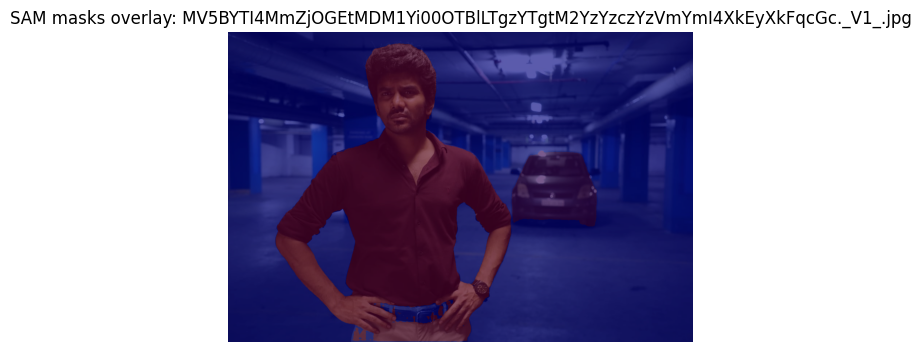

In [29]:
# Cell 12 Visual Mask Overall output display
import matplotlib.pyplot as plt
import random

# Pick a random image and its mask
img_files = os.listdir(RAW_DIR)
mask_files = os.listdir(MASK_DIR)

img_file = random.choice(img_files)
matching_masks = [m for m in mask_files if m.startswith(os.path.splitext(img_file)[0])]

img = cv2.cvtColor(
    cv2.imread(os.path.join(RAW_DIR, img_file)),
    cv2.COLOR_BGR2RGB
)

plt.figure(figsize=(6,6))
plt.imshow(img)

for m in matching_masks:
    mask = cv2.imread(os.path.join(MASK_DIR, m), 0)
    plt.imshow(mask, alpha=0.4, cmap="jet")

plt.title(f"SAM masks overlay: {img_file}")
plt.axis("off")
plt.show()


In [31]:
# Cell 13 Applying mask to image - Focusing on seperating the clothings from the image
import cv2
import numpy as np

def apply_mask(image_rgb, mask):
    """
    image_rgb: HxWx3
    mask: HxW (0 or 255)
    """
    masked = image_rgb.copy()
    masked[mask == 0] = [0, 0, 0]
    return masked


In [32]:
# Cell 14 Cropping Upper body Region First
def get_upper_body(image, mask, upper_ratio=0.55):
    """
    Takes top 55% of the masked person region
    """
    h, w = mask.shape
    upper_h = int(h * upper_ratio)

    upper_mask = mask[:upper_h, :]
    upper_img = image[:upper_h, :]

    return upper_img, upper_mask


In [33]:
# Cell 15 Domaniting color is taken using K-Means
from sklearn.cluster import KMeans

def extract_dominant_color(image, mask, k=3):
    """
    Returns dominant RGB color inside mask
    """
    pixels = image[mask > 0]
    pixels = pixels.reshape(-1, 3)

    if len(pixels) < 50:
        return None

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)

    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]

    return dominant.astype(int)


In [41]:
# Cell 17 was replaced

In [34]:
# Cell 16 Converting RGB -> Readable Human format
def rgb_to_color_name(rgb):
    r, g, b = rgb

    if r > 200 and g > 200 and b > 200:
        return "White"
    if r < 50 and g < 50 and b < 50:
        return "Black"
    if r > g and r > b:
        return "Red"
    if g > r and g > b:
        return "Green"
    if b > r and b > g:
        return "Blue"
    return "Mixed"


In [36]:
#Printing Results
print(results_json[:3])


[{'image': '2025-12-11T07_08_13.116Z-image.png', 'item_id': '2025-12-11T07_08_13.116Z-image.png_item_0', 'attributes': {'dominant_color_rgb': [33, 30, 41], 'dominant_color_name': 'Black'}}, {'image': '2025-12-11T07_08_13.116Z-image.png', 'item_id': '2025-12-11T07_08_13.116Z-image.png_item_1', 'attributes': {'dominant_color_rgb': [41, 40, 42], 'dominant_color_name': 'Black'}}, {'image': 'Simbu-1-1.jpg', 'item_id': 'Simbu-1-1.jpg_item_0', 'attributes': {'dominant_color_rgb': [52, 20, 4], 'dominant_color_name': 'Red'}}]


In [37]:
# Cell 18 Ignoring Dark Pixels and Backgrounds
def filter_dark_pixels(pixels, threshold=40):
    """
    Remove near-black pixels caused by shadows
    """
    return pixels[
        (pixels[:,0] > threshold) |
        (pixels[:,1] > threshold) |
        (pixels[:,2] > threshold)
    ]


In [38]:
# Cell 19 HSV Saturation
def filter_low_saturation(image_rgb, mask, sat_thresh=30):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    sat = hsv[:,:,1]

    valid = (mask > 0) & (sat > sat_thresh)
    return image_rgb[valid]


In [39]:
# Cell 20 
#Extracting Dominant Color 
from sklearn.cluster import KMeans

def extract_dominant_color(image, mask, k=3):
    # Filter by saturation
    pixels = filter_low_saturation(image, mask)

    if len(pixels) < 50:
        return None

    # Remove near-black pixels
    pixels = filter_dark_pixels(pixels)

    if len(pixels) < 50:
        return None

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)

    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]

    return dominant.astype(int)


In [43]:
def get_brightness(rgb):
    return int(np.mean(rgb))


In [44]:
# Replacing Current RGB names 
def rgb_to_color_name(rgb):
    r, g, b = rgb
    brightness = (r + g + b) / 3

    # Very dark → treat as dark-colored clothing
    if brightness < 50:
        # Distinguish dark warm vs dark cool
        if r > b + 10:
            return "Maroon"
        if b > r + 10:
            return "Navy"
        return "Black"

    # Normal lighting
    if r > g and r > b:
        return "Red"
    if g > r and g > b:
        return "Green"
    if b > r and b > g:
        return "Blue"

    return "Mixed"


In [45]:
# Cell 21
# Running Attribute Extraction on All the Images to Extract Clothing
import os
import json

BASE_DIR = "/kaggle/working/phase1"
RAW_DIR = f"{BASE_DIR}/data/raw_images"
MASK_DIR = f"{BASE_DIR}/data/masks"
OUT_JSON = f"{BASE_DIR}/outputs/json"

os.makedirs(OUT_JSON, exist_ok=True)

results_json = []

for img_name in os.listdir(RAW_DIR):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(RAW_DIR, img_name)
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # find corresponding masks
    masks = [m for m in os.listdir(MASK_DIR) if m.startswith(os.path.splitext(img_name)[0])]

    for idx, mask_name in enumerate(masks):
        mask = cv2.imread(os.path.join(MASK_DIR, mask_name), 0)

        masked_img = apply_mask(image, mask)
        upper_img, upper_mask = get_upper_body(masked_img, mask)

        dominant_rgb = extract_dominant_color(upper_img, upper_mask)

        if dominant_rgb is None:
            continue

        color_name = rgb_to_color_name(dominant_rgb)

        results_json.append({
            "image": img_name,
            "item_id": f"{img_name}_item_{idx}",
            "attributes": {
                "dominant_color_rgb": dominant_rgb.tolist(),
                "dominant_color_name": color_name
            }
        })

# Save JSON
json_path = os.path.join(OUT_JSON, "phase1_attributes.json")
with open(json_path, "w") as f:
    json.dump(results_json, f, indent=2)

print(f"Attributes saved to {json_path}")


Attributes saved to /kaggle/working/phase1/outputs/json/phase1_attributes.json


In [46]:
#Printing Results
print(results_json[:3])


[{'image': '2025-12-11T07_08_13.116Z-image.png', 'item_id': '2025-12-11T07_08_13.116Z-image.png_item_0', 'attributes': {'dominant_color_rgb': [40, 36, 51], 'dominant_color_name': 'Navy'}}, {'image': '2025-12-11T07_08_13.116Z-image.png', 'item_id': '2025-12-11T07_08_13.116Z-image.png_item_1', 'attributes': {'dominant_color_rgb': [39, 37, 43], 'dominant_color_name': 'Black'}}, {'image': 'Simbu-1-1.jpg', 'item_id': 'Simbu-1-1.jpg_item_0', 'attributes': {'dominant_color_rgb': [52, 20, 4], 'dominant_color_name': 'Maroon'}}]


In [47]:
# Visualization Utility
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
import os


In [51]:
#Visualizing Utility + Mask and Color
def show_item(item):
    img_path = os.path.join(RAW_DIR, item["image"])
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    # extract item index safely
    item_idx = item["item_id"].split("_item_")[-1]

    # find matching mask
    possible_masks = [
        m for m in os.listdir(MASK_DIR)
        if m.startswith(os.path.splitext(item["image"])[0]) and f"_item_{item_idx}" in m
    ]

    if len(possible_masks) == 0:
        print(f"❌ No mask found for {item['item_id']}")
        return

    mask_path = os.path.join(MASK_DIR, possible_masks[0])
    mask = cv2.imread(mask_path, 0)

    if mask is None:
        print(f"❌ Failed to load mask: {mask_path}")
        return

    rgb = np.array(item["attributes"]["dominant_color_rgb"])
    color_name = item["attributes"]["dominant_color_name"]

    # create color swatch
    swatch = np.ones((120, 120, 3), dtype=np.uint8)
    swatch[:] = rgb

    plt.figure(figsize=(13,4))

    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5, cmap="jet")
    plt.title("Mask Overlay")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(swatch)
    plt.title(f"{color_name}\nRGB {rgb.tolist()}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



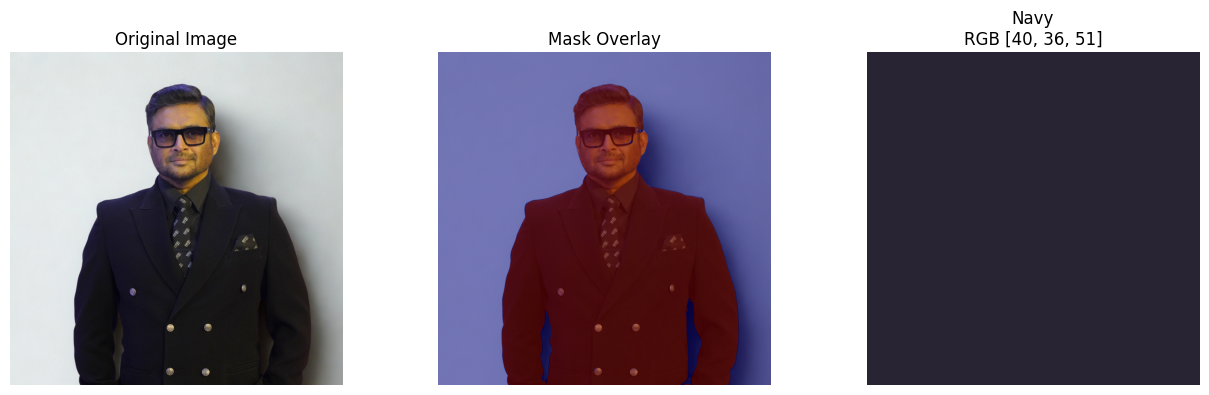

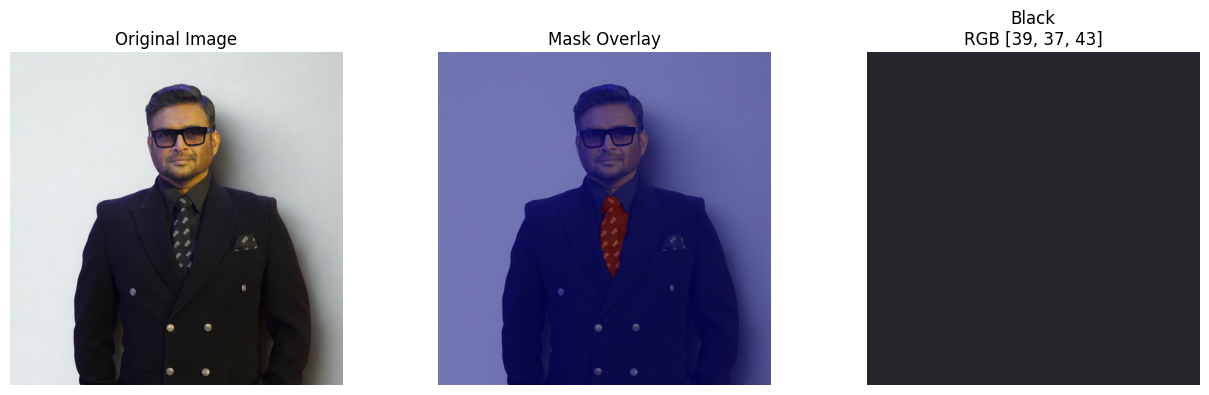

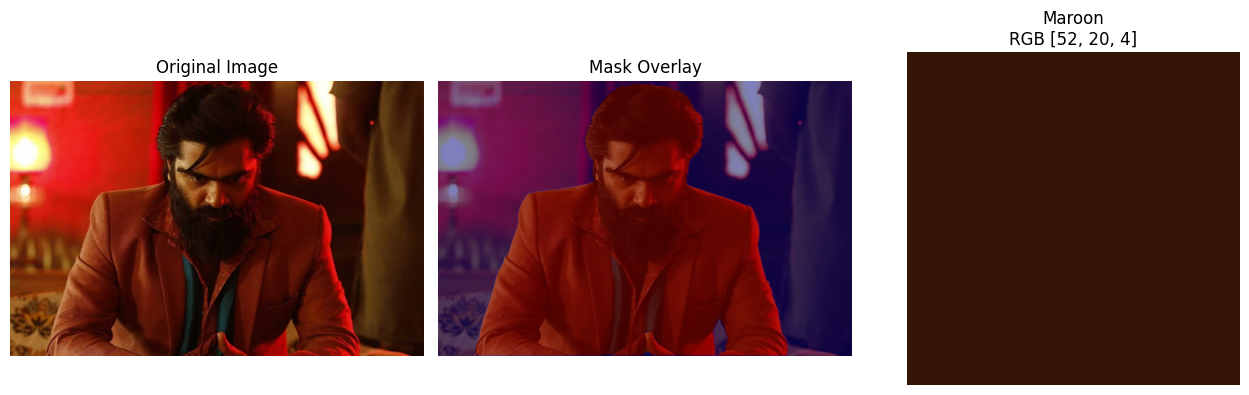

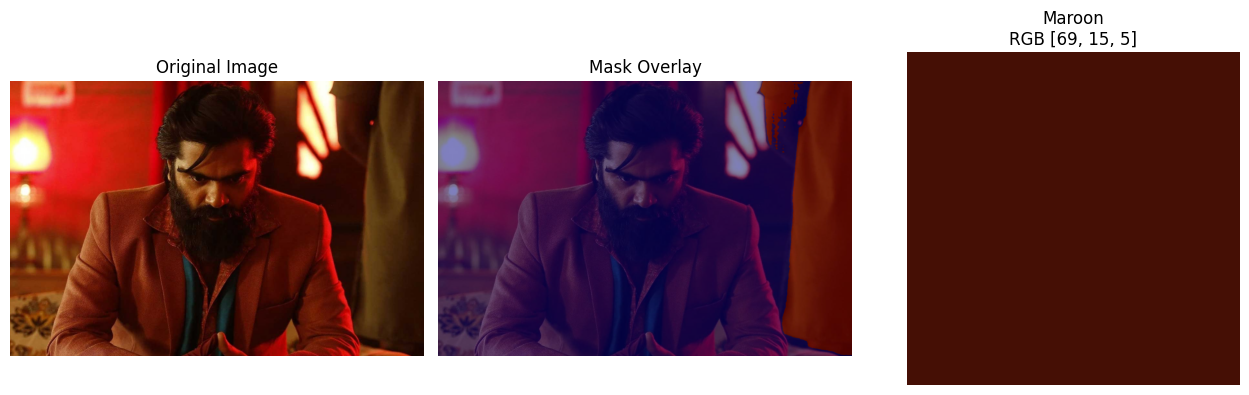

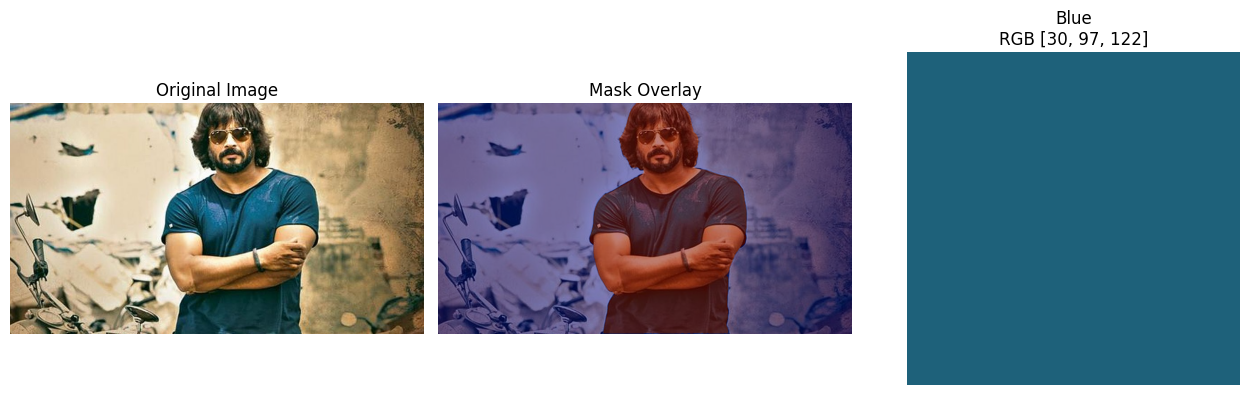

In [53]:
#Running Visualization 
for item in attrs[:5]:
    show_item(item)


In [54]:
# Cell 22 CLIP EMBEDDING
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

print("CLIP loaded on", device)


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 109MiB/s]


CLIP loaded on cuda


In [55]:
#Preparing mask for clipping 
from PIL import Image
import numpy as np

def prepare_clip_input(image_rgb, mask):
    masked = image_rgb.copy()
    masked[mask == 0] = [0, 0, 0]
    return clip_preprocess(Image.fromarray(masked)).unsqueeze(0)


In [56]:
#Extracting for clip embedding
def get_clip_embedding(image_rgb, mask):
    clip_input = prepare_clip_input(image_rgb, mask).to(device)
    with torch.no_grad():
        emb = clip_model.encode_image(clip_input)
        emb = emb / emb.norm(dim=-1, keepdim=True)
    return emb.cpu().numpy()[0]


In [57]:
#Running it on all items and saving it as json
import os
import json
import cv2

BASE_DIR = "/kaggle/working/phase1"
RAW_DIR = f"{BASE_DIR}/data/raw_images"
MASK_DIR = f"{BASE_DIR}/data/masks"
OUT_DIR = f"{BASE_DIR}/outputs/json"

os.makedirs(OUT_DIR, exist_ok=True)

clip_results = []

for img_name in os.listdir(RAW_DIR):
    if not img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(RAW_DIR, img_name)
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    masks = [
        m for m in os.listdir(MASK_DIR)
        if m.startswith(os.path.splitext(img_name)[0])
    ]

    for idx, mask_name in enumerate(masks):
        mask = cv2.imread(os.path.join(MASK_DIR, mask_name), 0)

        emb = get_clip_embedding(image, mask)

        clip_results.append({
            "image": img_name,
            "item_id": f"{img_name}_item_{idx}",
            "clip_embedding": emb.tolist()
        })

json_path = os.path.join(OUT_DIR, "phase1_clip_embeddings.json")
with open(json_path, "w") as f:
    json.dump(clip_results, f)

print(f"Saved CLIP embeddings to {json_path}")


Saved CLIP embeddings to /kaggle/working/phase1/outputs/json/phase1_clip_embeddings.json


In [58]:
#Sanity check on clip embedding
print("Embedding length:", len(clip_results[0]["clip_embedding"]))


Embedding length: 512


In [59]:
import numpy as np
print("Norm:", np.linalg.norm(clip_results[0]["clip_embedding"]))


Norm: 0.9997639282597215


In [60]:
!zip -r phase1_full.zip /kaggle/working/phase1


  adding: kaggle/working/phase1/ (stored 0%)
  adding: kaggle/working/phase1/outputs/ (stored 0%)
  adding: kaggle/working/phase1/outputs/json/ (stored 0%)
  adding: kaggle/working/phase1/outputs/json/phase1_attributes.json (deflated 83%)
  adding: kaggle/working/phase1/outputs/json/phase1_clip_embeddings.json (deflated 76%)
  adding: kaggle/working/phase1/outputs/visualizations/ (stored 0%)
  adding: kaggle/working/phase1/outputs/visualizations/yolo_2025-12-11T07_08_13.116Z-image.png (deflated 9%)
  adding: kaggle/working/phase1/outputs/visualizations/yolo_1489041996-r-madhavan-fb-517.jpg (deflated 3%)
  adding: kaggle/working/phase1/outputs/visualizations/yolo_madhavan-stills-photos-pictures-92.jpg (deflated 5%)
  adding: kaggle/working/phase1/outputs/visualizations/yolo_pexels-amar-33508017.jpg (deflated 10%)
  adding: kaggle/working/phase1/outputs/visualizations/yolo_MV5BYTI4MmZjOGEtMDM1Yi00OTBlLTgzYTgtM2YzYzczYzVmYmI4XkEyXkFqcGc._V1_.jpg (deflated 9%)
  adding: kaggle/working/phas